DESCRIPTION !

In this project, I built a Convolutional Neural Network (CNN) using TensorFlow and Keras to classify images from the Fashion MNIST dataset. The images were first normalized and reshaped to fit the CNN input format. The model includes two convolutional layers with max-pooling, followed by a dense layer and an output layer with softmax activation for classification. I trained the model using different settings to study how filter size, regularization, batch size, and optimizer choice affect performance. Each variation was tested and evaluated based on accuracy, and the results were visualized using a bar chart. Overall, the model performed best with a smaller filter size, no regularization, a smaller batch size, and the Adam optimizer.

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Filter size 3: Test Accuracy = 0.9029
Filter size 5: Test Accuracy = 0.8881
Filter size 7: Test Accuracy = 0.8892
No regularization: Test Accuracy = 0.8965
L2 regularization: Test Accuracy = 0.8815
Batch size 32: Test Accuracy = 0.9077
Batch size 64: Test Accuracy = 0.8900
Batch size 128: Test Accuracy = 0.8855
Optimizer adam: Test Accuracy = 0.8992
Optimizer sgd: Test Accuracy = 0.8198


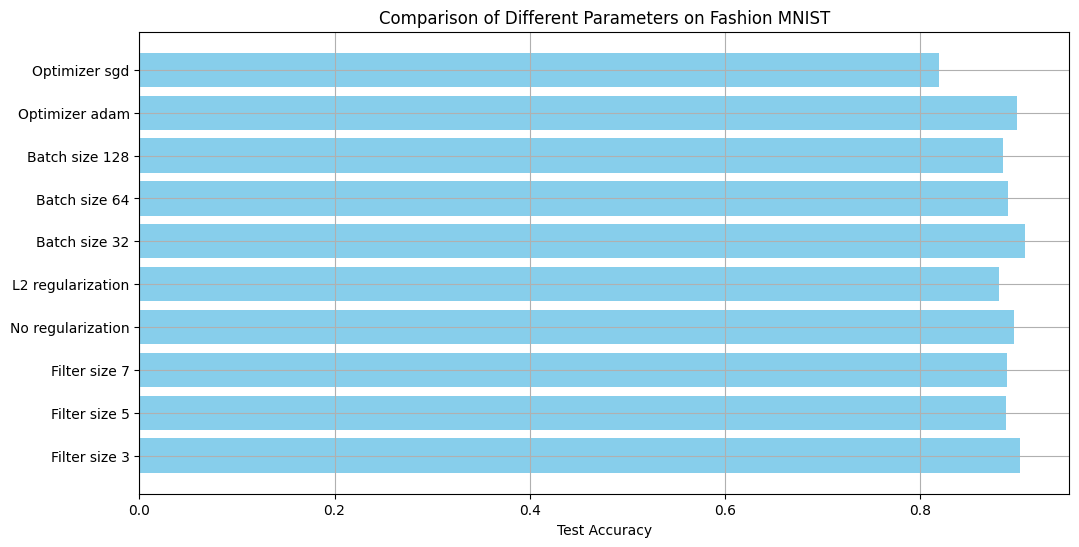

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, regularizers
from tensorflow.keras.optimizers import Adam, SGD

# Load Fashion MNIST dataset
(x_train, y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

def create_model(filter_size=3, regularization=None, optimizer='adam'):
    model = models.Sequential()
    model.add(layers.Conv2D(32, (filter_size, filter_size), activation='relu', input_shape=(28,28,1),
                            kernel_regularizer=regularization))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Conv2D(64, (filter_size, filter_size), activation='relu',
                            kernel_regularizer=regularization))
    model.add(layers.MaxPooling2D((2,2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation='relu', kernel_regularizer=regularization))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer=optimizer,
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# Function to train and evaluate
results = {}
def train_and_evaluate(filter_size=3, regularization=None, batch_size=64, optimizer='adam', label='default'):
    model = create_model(filter_size=filter_size, regularization=regularization, optimizer=optimizer)
    history = model.fit(x_train, y_train, epochs=5, batch_size=batch_size, validation_split=0.1, verbose=0)
    test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
    results[label] = {'history': history, 'test_accuracy': test_acc}
    print(f"{label}: Test Accuracy = {test_acc:.4f}")

# 1. Effect of filter size
for fs in [3, 5, 7]:
    train_and_evaluate(filter_size=fs, label=f'Filter size {fs}')

# 2. Effect of regularization
for reg in [None, regularizers.l2(0.001)]:
    label = 'No regularization' if reg is None else 'L2 regularization'
    train_and_evaluate(regularization=reg, label=label)

# 3. Effect of batch size
for bs in [32, 64, 128]:
    train_and_evaluate(batch_size=bs, label=f'Batch size {bs}')

# 4. Effect of optimizer
for opt in ['adam', 'sgd']:
    train_and_evaluate(optimizer=opt, label=f'Optimizer {opt}')

# Plotting Results
labels = list(results.keys())
accuracies = [results[k]['test_accuracy'] for k in labels]

plt.figure(figsize=(12,6))
plt.barh(labels, accuracies, color='skyblue')
plt.xlabel('Test Accuracy')
plt.title('Comparison of Different Parameters on Fashion MNIST')
plt.grid(True)
plt.show()

MY COMMENTS !

The model worked best with a 3x3 filter — it gave the highest accuracy. So, smaller filters seem to capture more useful details in these images.

When I tried 5x5 and 7x7 filters, the accuracy dropped a little. Bigger filters didn’t help and might be losing finer patterns.

I added L2 regularization to reduce overfitting, but instead, the accuracy actually went down slightly.

It turns out the model performs better without regularization, probably because it wasn’t overfitting much in the first place.

A batch size of 32 gave me the highest accuracy, which suggests smaller batches help the model learn more effectively.

When I increased the batch size to 64 and 128, the accuracy decreased. So, large batches may not generalize as well in this case.

The Adam optimizer performed really well. It gave me almost 90% accuracy and clearly adapted better during training.

On the other hand, SGD didn't do so well. The accuracy dropped to around 82%, which is a big difference. Maybe it needs more epochs to catch up.

The bar chart made it super easy to compare how each change affected the test accuracy. It's a quick visual summary.

Overall, I realized that simple architecture can still work great — tuning the right hyperparameters matters more than adding complexity.